**1.1 Answer the following questions:**

**1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]**

If our model does much better on the training set than on the test set, then we’re likely overfitting.
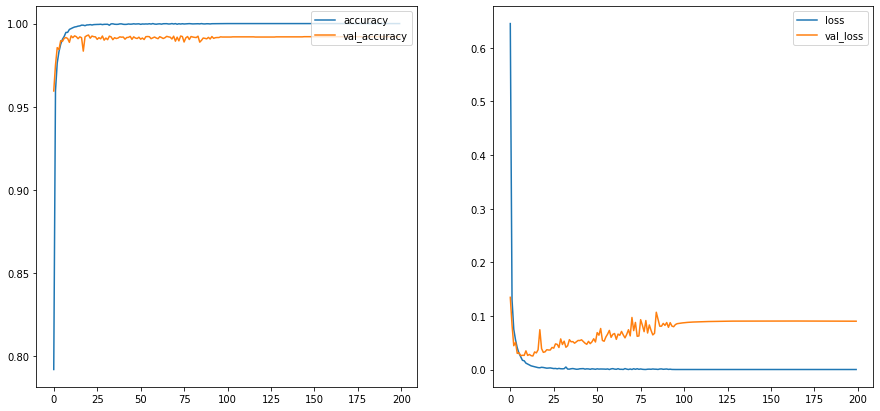
If the algorithm is too complex or flexible (e.g. it has too many input features or it’s not properly regularized), it can end up “memorizing the training dataset” instead of finding the features.

This overfit model will then make predictions based on that relationship between input and labels in training dataset. It will perform unusually well on its training data… yet very poorly on new test dataset.

**2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]**
Overfitting is a term used in statistics that refers to a modeling error that occurs when a function corresponds too closely to a particular set of data. As a result, overfitting may fail to fit additional data, and this may affect the accuracy of predicting future observations.

**3.   Name two ways to avoid this. [+2 answer, +2 answer]**
1. Training with more data
One of the ways to prevent overfitting is by training with more data. Such an option makes it easy for algorithms to detect the signal better to minimize errors. As the user feeds more training data into the model, it will be unable to overfit all the samples and will be forced to generalize to obtain results.

Users should continually collect more data as a way of increasing the accuracy of the model. However, this method is considered expensive, and, therefore, users should ensure that the data being used is relevant and clean.

 

2. Data augmentation
An alternative to training with more data is data augmentation, which is less expensive compared to the former. If you are unable to continually collect more data, you can make the available data sets appear diverse. Data augmentation makes a sample data look slightly different every time it is processed by the model. The process makes each data set appear unique to the model and prevents the model from learning the characteristics of the data sets.

Another option that works in the same way as data augmentation is adding noise to the input and output data. Adding noise to the input makes the model become stable, without affecting data quality and privacy, while adding noise to the output makes the data more diverse. However, noise addition should be done with moderation so that the extent of the noise is not so much as to make the data incorrect or too different.

 

3. Data Simplification
Overfitting can occur due to the complexity of a model, such that, even with large volumes of data, the model still manages to overfit the training dataset. The data simplification method is used to reduce overfitting by decreasing the complexity of the model to make it simple enough that it does not overfit.

Some of the actions that can be implemented include pruning a decision tree, reducing the number of parameters in a neural network, and using dropout on a neutral network. Simplifying the model can also make the model lighter and run faster.

 

4. Ensembling
Ensembling is a machine learning technique that works by combining predictions from two or more separate models. The most popular ensembling methods include boosting and bagging. Boosting works by using simple base models to increase their aggregate complexity. It trains a large number of weak learners arranged in a sequence, such that each learner in the sequence learns from the mistakes of the learner before it.

Boosting combines all the weak learners in the sequence to bring out one strong learner. The other ensembling method is bagging, which is the opposite of boosting. Bagging works by training a large number of strong learners arranged in a parallel pattern and then combining them to optimize their predictions.

**1.2 Answer the following question:** 

**1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]**

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.Dropout equivalent to regularized Network

Fig: w/wo dropout and dropout in diffrent layers

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

In [2]:
# Check that TF 2.1.0 is in use
print(tf.__version__)

2.1.0


In [16]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
#Normalize
data_train = data_train / 255
data_test = data_test /255
#Reshape
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

## 1.1 Overfitting 

In [17]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = tf.keras.models.Sequential()

    #### Fill in Model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    
    return model

CNN_overfit = CNN_overfit()
print(CNN_overfit.summary())
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               320100    
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

Epoch 45/200
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0470 - val_accuracy: 0.9923
Epoch 46/200
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0525 - val_accuracy: 0.9905
Epoch 47/200
60000/60000 [==============================] - 10s 164us/sample - loss: 4.1015e-04 - accuracy: 0.9999 - val_loss: 0.0482 - val_accuracy: 0.9920
Epoch 48/200
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0516 - val_accuracy: 0.9913
Epoch 49/200
60000/60000 [==============================] - 9s 155us/sample - loss: 9.7384e-04 - accuracy: 0.9998 - val_loss: 0.0574 - val_accuracy: 0.9910
Epoch 50/200
60000/60000 [==============================] - 9s 153us/sample - loss: 4.1676e-04 - accuracy: 0.9998 - val_loss: 0.0513 - val_accuracy: 0.9918
Epoch 51/200
60000/60000 [==============================] - 9s 155us/samp

60000/60000 [==============================] - 10s 169us/sample - loss: 6.0598e-09 - accuracy: 1.0000 - val_loss: 0.0854 - val_accuracy: 0.9920
Epoch 98/200
60000/60000 [==============================] - 10s 168us/sample - loss: 2.4915e-09 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9919
Epoch 99/200
60000/60000 [==============================] - 10s 170us/sample - loss: 1.6173e-09 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9919
Epoch 100/200
60000/60000 [==============================] - 10s 169us/sample - loss: 1.2358e-09 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9919
Epoch 101/200
60000/60000 [==============================] - 10s 159us/sample - loss: 1.0192e-09 - accuracy: 1.0000 - val_loss: 0.0872 - val_accuracy: 0.9919
Epoch 102/200
60000/60000 [==============================] - 10s 160us/sample - loss: 8.5831e-10 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9919
Epoch 103/200
60000/60000 [==============================] - 10s 163

60000/60000 [==============================] - 10s 161us/sample - loss: 9.5367e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 150/200
60000/60000 [==============================] - 9s 156us/sample - loss: 9.9341e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 151/200
60000/60000 [==============================] - 9s 158us/sample - loss: 9.1394e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 152/200
60000/60000 [==============================] - 10s 159us/sample - loss: 9.7354e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 153/200
60000/60000 [==============================] - 9s 156us/sample - loss: 8.5433e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 154/200
60000/60000 [==============================] - 9s 157us/sample - loss: 8.1460e-11 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9921
Epoch 155/200
60000/60000 [==============================] - 9s 156us/

10000/10000 [==============================] - 2s 153us/sample - loss: 0.0901 - accuracy: 0.9921
Accuracy: 99.21%


In [18]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


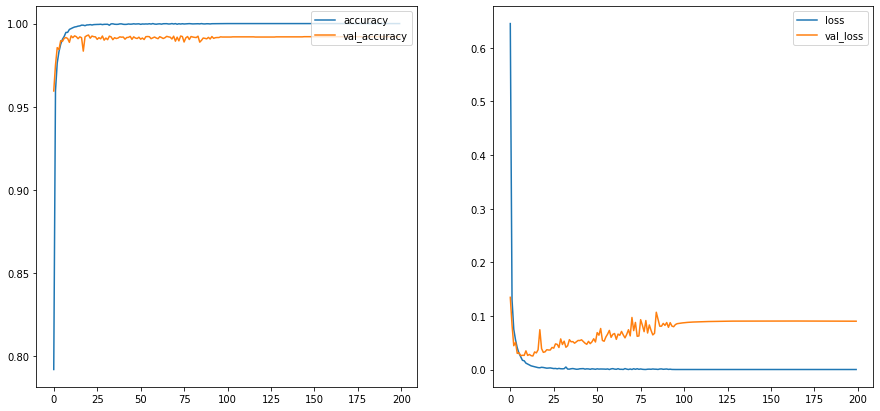

In [19]:
#Plot accuracy vs epoch
plt.figure(figsize=(15,7))
plt.subplot(121)
#### Fill in plot ####
plt.plot(history_overfit.history['accuracy'], label='accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper right')

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss'],label='loss')
plt.plot(history_overfit.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
#### Fill in plot ####


In [48]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = tf.keras.models.Sequential()
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=2, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 841s 14ms/sample - loss: 2.2959 - accuracy: 0.1155 - val_loss: 2.2953 - val_accuracy: 0.1259
Epoch 2/2
10000/10000 [==============================] - 14s 1ms/sample - loss: 2.2920 - accuracy: 0.1422
Accuracy: 14.22%


Section 2- Autoencoders

In [65]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(data_train.shape[0], 784)
data_test_reshape_fcae = data_test.reshape(data_test.shape[0], 784)

In [82]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(784,)))
    # Encoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    
    # Decoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    
    model.add(tf.keras.layers.Dense(784, activation='sigmoid'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
print(deep_ae.summary())
deep_ae.compile(loss='mse', optimizer='adadelta')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=15, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 400)               314000    
_________________________________________________________________
dense_118 (Dense)            (None, 200)               80200     
_________________________________________________________________
dense_119 (Dense)            (None, 100)               20100     
_________________________________________________________________
dense_120 (Dense)            (None, 200)               20200     
_________________________________________________________________
dense_121 (Dense)            (None, 400)               80400     
_________________________________________________________________
dense_122 (Dense)            (None, 784)               314384    
Total params: 829,284
Trainable params: 829,284
Non-trainable params: 0
_______________________________________________

dict_keys(['loss', 'val_loss'])


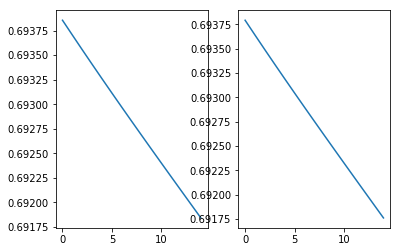

In [74]:
#Plot train/validation loss vs epoch
# Information contained in history dict.
print(history_deep_ae.history.keys())
#### Fill in plot ####
plt.subplot(121)
plt.plot(history_deep_ae.history['loss'])

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_deep_ae.history['val_loss'])
#### Fill in the plot ####


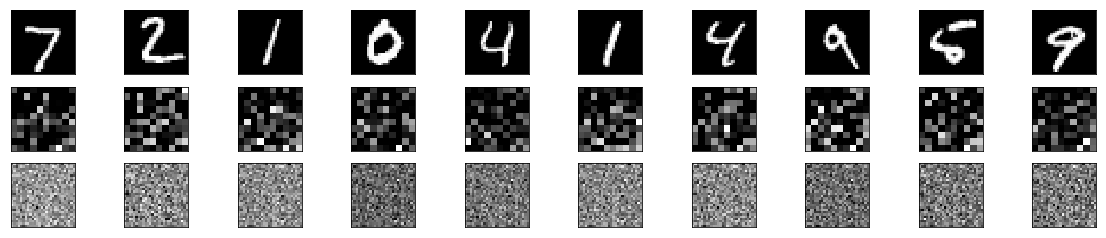

In [75]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

In [76]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test_reshape_cae = data_test.reshape(data_test.shape[0], 28, 28, 1)

In [95]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = tf.keras.models.Sequential()
    
    #Encoder
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same', input_shape=(28, 28, 1)))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    #### Fill in model ####
    
    #Decoder
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(1 , (3, 3), activation='sigmoid',padding='same'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 14, 14, 16)      

In [96]:
conv_ae.compile(loss='mse', optimizer='adadelta')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=2, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 59s 989us/sample - loss: 0.2290 - val_loss: 0.2288
Epoch 2/2
60000/60000 [==============================] - 53s 887us/sample - loss: 0.2283 - val_loss: 0.2279


dict_keys(['loss', 'val_loss'])


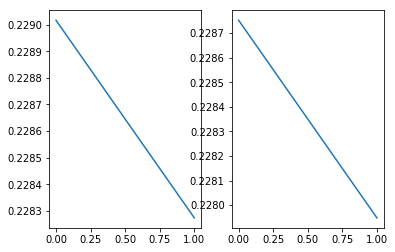

In [97]:
#Plot train/validation loss vs epoch
# Information contained in history dict.
print(history_conv_ae.history.keys())
#### Fill in plot ####
plt.subplot(121)
plt.plot(history_conv_ae.history['loss'])

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_conv_ae.history['val_loss'])
#### Fill in the plot #### 

<Figure size 432x288 with 0 Axes>

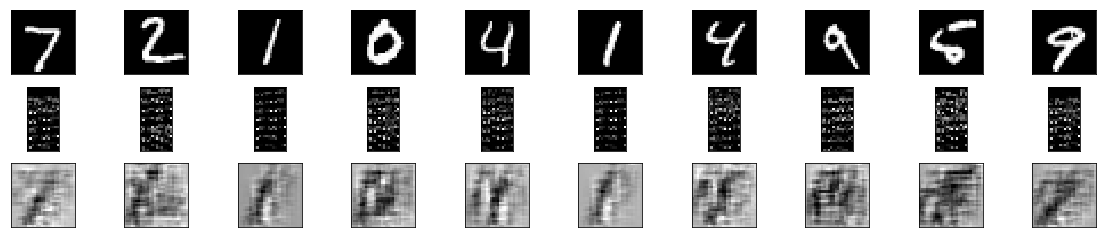

In [98]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()